In [1]:
import pandas as pd
import numpy as np

In [2]:
col = ['user_id','item_id','rating','timestamp']

df = pd.read_csv('u.data',sep='\t',names=col)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742



Now let's get the movie titles:

In [4]:
mov_titles = pd.read_csv('Movie_Id_Titles')
mov_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
df = pd.merge(df,mov_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [25]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [26]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [31]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [32]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [33]:
ratings['num_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [39]:
ratings.head()

,rating,num_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


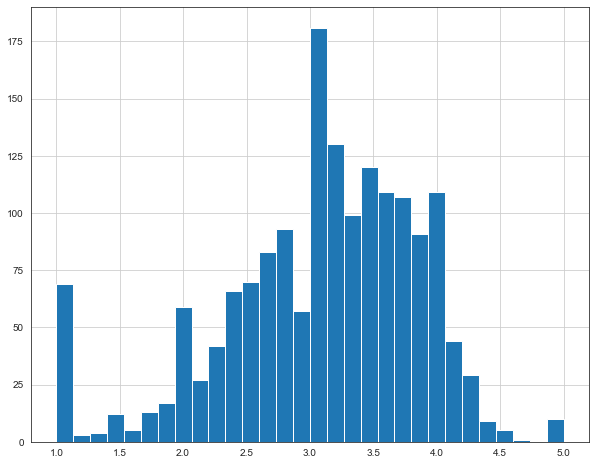

In [35]:
plt.figure(figsize=(10,8))
ratings['rating'].hist(bins=30)

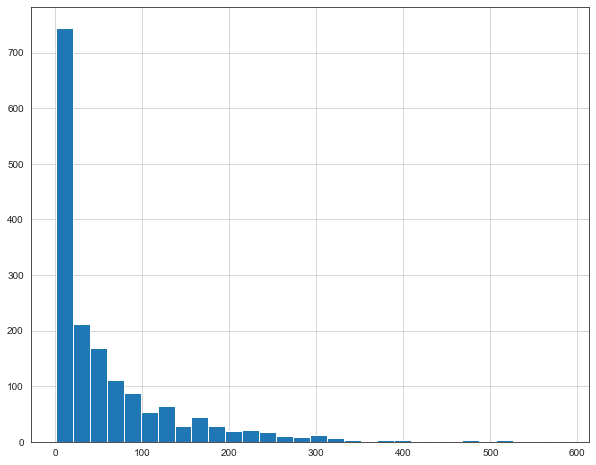

In [36]:
plt.figure(figsize=(10,8))
ratings['num_ratings'].hist(bins=30)

# Recommending movies

Creating a pivot table for users and their ratings for each movie

In [37]:
mov_matrix = df.pivot_table(index='user_id',columns='title',values='rating')

In [38]:
mov_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
ratings.sort_values('num_ratings',ascending=False).head(10)

,rating,num_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431



Let's choose two movies: starwars, a sci-fi movie. And Toy Story, an animated one.

Now let's grab the user ratings for those two movies:

In [50]:
starwars_user_ratings = mov_matrix['Star Wars (1977)']
toystory_user_ratings = mov_matrix['Toy Story (1995)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [51]:
toystory_user_ratings.head()

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [52]:
similar_to_starwars = mov_matrix.corrwith(starwars_user_ratings)
similar_to_toystory = mov_matrix.corrwith(toystory_user_ratings)

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [54]:
similar_to_starwars.sort_values(ascending=False).head(10)

title
Hollow Reed (1996)                                                                   1.0
Stripes (1981)                                                                       1.0
Full Speed (1996)                                                                    1.0
Golden Earrings (1947)                                                               1.0
Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)    1.0
Star Wars (1977)                                                                     1.0
Ed's Next Move (1996)                                                                1.0
Scarlet Letter, The (1926)                                                           1.0
Hurricane Streets (1998)                                                             1.0
Safe Passage (1994)                                                                  1.0
dtype: float64

In [55]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [56]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [57]:
corr_starwars.dropna(inplace=True)

In [58]:
corr_starwars.head(10)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [60]:
corr_starwars['Correlation'].sort_values(ascending=False).head(10)

title
Hollow Reed (1996)                                                                   1.0
Stripes (1981)                                                                       1.0
Full Speed (1996)                                                                    1.0
Golden Earrings (1947)                                                               1.0
Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)    1.0
Star Wars (1977)                                                                     1.0
Ed's Next Move (1996)                                                                1.0
Scarlet Letter, The (1926)                                                           1.0
Hurricane Streets (1998)                                                             1.0
Safe Passage (1994)                                                                  1.0
Name: Correlation, dtype: float64

Above shown most movies are almost correlated with Star Wars because only one user may have watched the movie and given 5 rating.
We can fix this by considering movies only with a set of number of ratings

In [62]:
corr_starwars = corr_starwars.join(ratings['num_ratings'])
corr_starwars.head()

,Correlation,num_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Lets consider movies with number of ratings more than 100

In [63]:
corr_starwars[corr_starwars['num_ratings']>100]

,Correlation,num_ratings
title,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2001: A Space Odyssey (1968),0.230884,259
Absolute Power (1997),0.085440,127
"Abyss, The (1989)",0.203709,151
Ace Ventura: Pet Detective (1994),0.062689,103
"Adventures of Priscilla, Queen of the Desert, The (1994)",0.054740,111
"African Queen, The (1951)",0.230540,152
Air Force One (1997),0.113164,431


In [64]:
corr_starwars[corr_starwars['num_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [65]:
corr_toystory = pd.DataFrame(similar_to_toystory,columns=['Correlation'])

In [66]:
corr_toystory.head(5)

,Correlation
title,
'Til There Was You (1997),0.534522
1-900 (1994),NaN
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857


In [67]:
corr_toystory.dropna(inplace=True)

In [68]:
corr_toystory.head(5)

,Correlation
title,
'Til There Was You (1997),0.534522
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728


In [69]:
corr_toystory = corr_toystory.join(rating['num_ratings'])

In [70]:
corr_toystory.head(5)

,Correlation,num_ratings
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


In [71]:
corr_toystory[corr_toystory['num_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num_ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
